In [21]:
from dataraw_sampling_SETShatter import *
import itertools

import matplotlib.pyplot as plt

In [22]:
# try simply putting stars in query, how many subsets can we get?

In [23]:
num_attributes = 3; num_attr_vals = 3;
num_keys = num_attr_vals ** num_attributes

In [40]:
def resolve(card1_prop, card2_prop, all_vals_list, all_vals_set):
    '''
    card1_prop/card2_prop: [1, 0 ,*], [2,0,1]
    return answer cards
    '''
    ind_ans = [resolve_prop(prop1, prop2, all_vals_list, all_vals_set) for prop1, prop2 in zip(card1_prop, card2_prop)]
    return tuple(itertools.product(*ind_ans))

In [25]:
x = [[1],[2,0],[0,1,2]]
list(itertools.product(*x))

[(1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2)]

In [26]:
def resolve_prop(prop1, prop2, all_vals_tuple, all_vals_set):
    if prop1 == len(all_vals_tuple) or prop2 == len(all_vals_tuple): # '*' symbol
        return all_vals_tuple
    elif prop1 == prop2:
        return (prop1,)
    else:
        return tuple(all_vals_set - set([prop1, prop2]))
    
assert resolve_prop(0,1,[0,1,2],set([0,1,2])) == (2,)

In [41]:
assert resolve((1, 2, 1), (1, 2, 3), all_vals_list=[0,1,2], all_vals_set=set([0,1,2])) == tuple([(1, 2, 0), (1, 2, 1), (1, 2, 2)])
assert resolve((1, 3, 1), (2, 2, 0), all_vals_list=[0,1,2], all_vals_set=set([0,1,2])) == tuple([(0, 0, 2), (0, 1, 2), (0, 2, 2)])

In [42]:
def draw_cardpair(num_attributes, num_attr_vals):
    all_vals_tuple = tuple(range(num_attr_vals))
    all_vals_set = set(all_vals_tuple)
    
    card1_prop = np.random.choice(a=num_attr_vals, size=num_attributes, replace=True)
    card2_prop = np.random.choice(a=num_attr_vals+1, size=num_attributes, replace=True)
    subset = resolve(card1_prop, card2_prop, all_vals_tuple, all_vals_set)
    # list
    return subset
    

In [43]:
def draw_N_cardpairs(num_attributes, num_attr_vals, N):
    all_subsets = []
    for i in range(N):
        subset_list = draw_cardpair(num_attributes, num_attr_vals)
        all_subsets += subset_list
    

IndentationError: expected an indented block (<ipython-input-43-2c3e7bc010ac>, line 4)

In [84]:
subsets = set()
subsets_lens = []
for _ in range(1000):
    subset = draw_cardpair(num_attributes=2, num_attr_vals=3)
    subsets.add(subset)
    subsets_lens.append(len(subset))

In [ ]:
# 1. How many subsets can we get
# 2. What are their len distributions

In [13]:
from collections import Counter

In [85]:
Counter(subsets_lens)

Counter({1: 555, 3: 356, 9: 89})

In [61]:
list(subsets)

[((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
 ((2, 0),),
 ((0, 0), (0, 1), (0, 2)),
 ((0, 1),),
 ((1, 1),),
 ((0, 2), (1, 2), (2, 2)),
 ((2, 2),),
 ((2, 0), (2, 1), (2, 2)),
 ((0, 1), (1, 1), (2, 1)),
 ((1, 0), (1, 1), (1, 2)),
 ((0, 0),),
 ((1, 2),),
 ((0, 0), (1, 0), (2, 0)),
 ((1, 0),),
 ((0, 2),),
 ((2, 1),)]

In [100]:
supersets = set()
coverage = []

for subset1, subset2 in itertools.product(list(subsets),list(subsets)):
    superset = set()
    superset = superset.union(set(subset1), set(subset2))
    supersets.add(tuple(sorted(list(superset))))
    coverage.append(len(tuple(sorted(list(superset)))))

In [101]:
len(supersets)

103

In [95]:
Counter(subsets_lens)

Counter({1: 555, 3: 356, 9: 89})

In [96]:
Counter(coverage)

Counter({9: 31, 1: 9, 4: 72, 2: 72, 3: 42, 5: 18, 6: 12})

In [13]:
set(subsets_lens)

{1, 3, 9, 27, 81, 243}

In [102]:
2**9

512

In [104]:
supersets = set()
coverage = []

for subset1, subset2, subset3, subset4 in itertools.product(list(subsets),list(subsets),list(subsets),list(subsets)):
    superset = set()
    superset = superset.union(set(subset1), set(subset2), set(subset3), set(subset4))
    supersets.add(tuple(sorted(list(superset))))
    coverage.append(len(tuple(sorted(list(superset)))))

In [105]:
Counter(coverage)

Counter({9: 15559,
         1: 9,
         4: 10008,
         2: 504,
         3: 4074,
         5: 13626,
         6: 12036,
         7: 8208,
         8: 1512})

In [106]:
len(supersets)

460

In [107]:
len(supersets)

460

In [98]:
supersets = set()
coverage = []

for subset1, subset2, subset3 in itertools.product(list(subsets),list(subsets),list(subsets)):
    superset = set()
    superset = superset.union(set(subset1), set(subset2), set(subset3))
    supersets.add(tuple(sorted(list(superset))))
    coverage.append(len(tuple(sorted(list(superset)))))

In [103]:
len(supersets)

103

In [92]:
Counter(subsets_lens)

Counter({1: 555, 3: 356, 9: 89})

In [81]:
Counter(coverage)

Counter({9: 733, 1: 9, 4: 864, 2: 216, 3: 726, 5: 864, 6: 468, 7: 216})

In [59]:
list(itertools.product(*[list(subsets) for _ in range(3)]))

[(((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2))),
 (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((2, 0),)),
 (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2))),
 (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 1),)),
 (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((1, 1),)),
 (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
  ((0, 0), (0, 1

In [14]:
all_combos = list(itertools.product(*[list(set(subsets_lens)) for _ in range(3)]))

In [20]:
len(set(sorted([sum(combo) for combo in all_combos if sum(combo) <= 243])))

35

In [19]:
sorted([sum(combo) for combo in all_3_combos if sum(combo) <= 243])

[13, 31, 37, 39, 85, 91, 93, 109, 111, 117]

In [20]:
len(sorted([sum(combo) for combo in all_3_combos if sum(combo) <= 243]))

10

(array([708., 235.,   0.,  53.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([ 1.,  9., 17., 25., 33., 41., 49., 57., 65., 73., 81.]),
 <BarContainer object of 10 artists>)

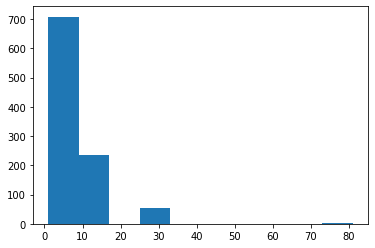

In [119]:
plt.hist(subsets_lens)

In [122]:
len(subsets) # keys = 81 --> shatter 2**81

256

In [ ]:
9553 -- 10 num attributes

In [ ]:
len(subsets) # keys = 81 --> shatter 2**81

In [128]:
import math

In [129]:
math.log2(95532)

16.543696447864093